<a href="https://colab.research.google.com/github/MarkusThill/MarkusThill.github.io-jupyter/blob/main/2024_03_31_voltage_divider.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Choosing a Voltage Divider Resistor for a Light Dependent Resistor
##Install dependencies first:


In [1]:
install.packages("reshape2")
install.packages("ggrepel")
install.packages("latex2exp")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Load the Packages

In [2]:
require(ggplot2)
require(reshape2)
require(ggrepel)
require(latex2exp)

Loading required package: ggplot2

Loading required package: reshape2

Loading required package: ggrepel

Loading required package: latex2exp



## Generate a Plot for different Resistor Configurations

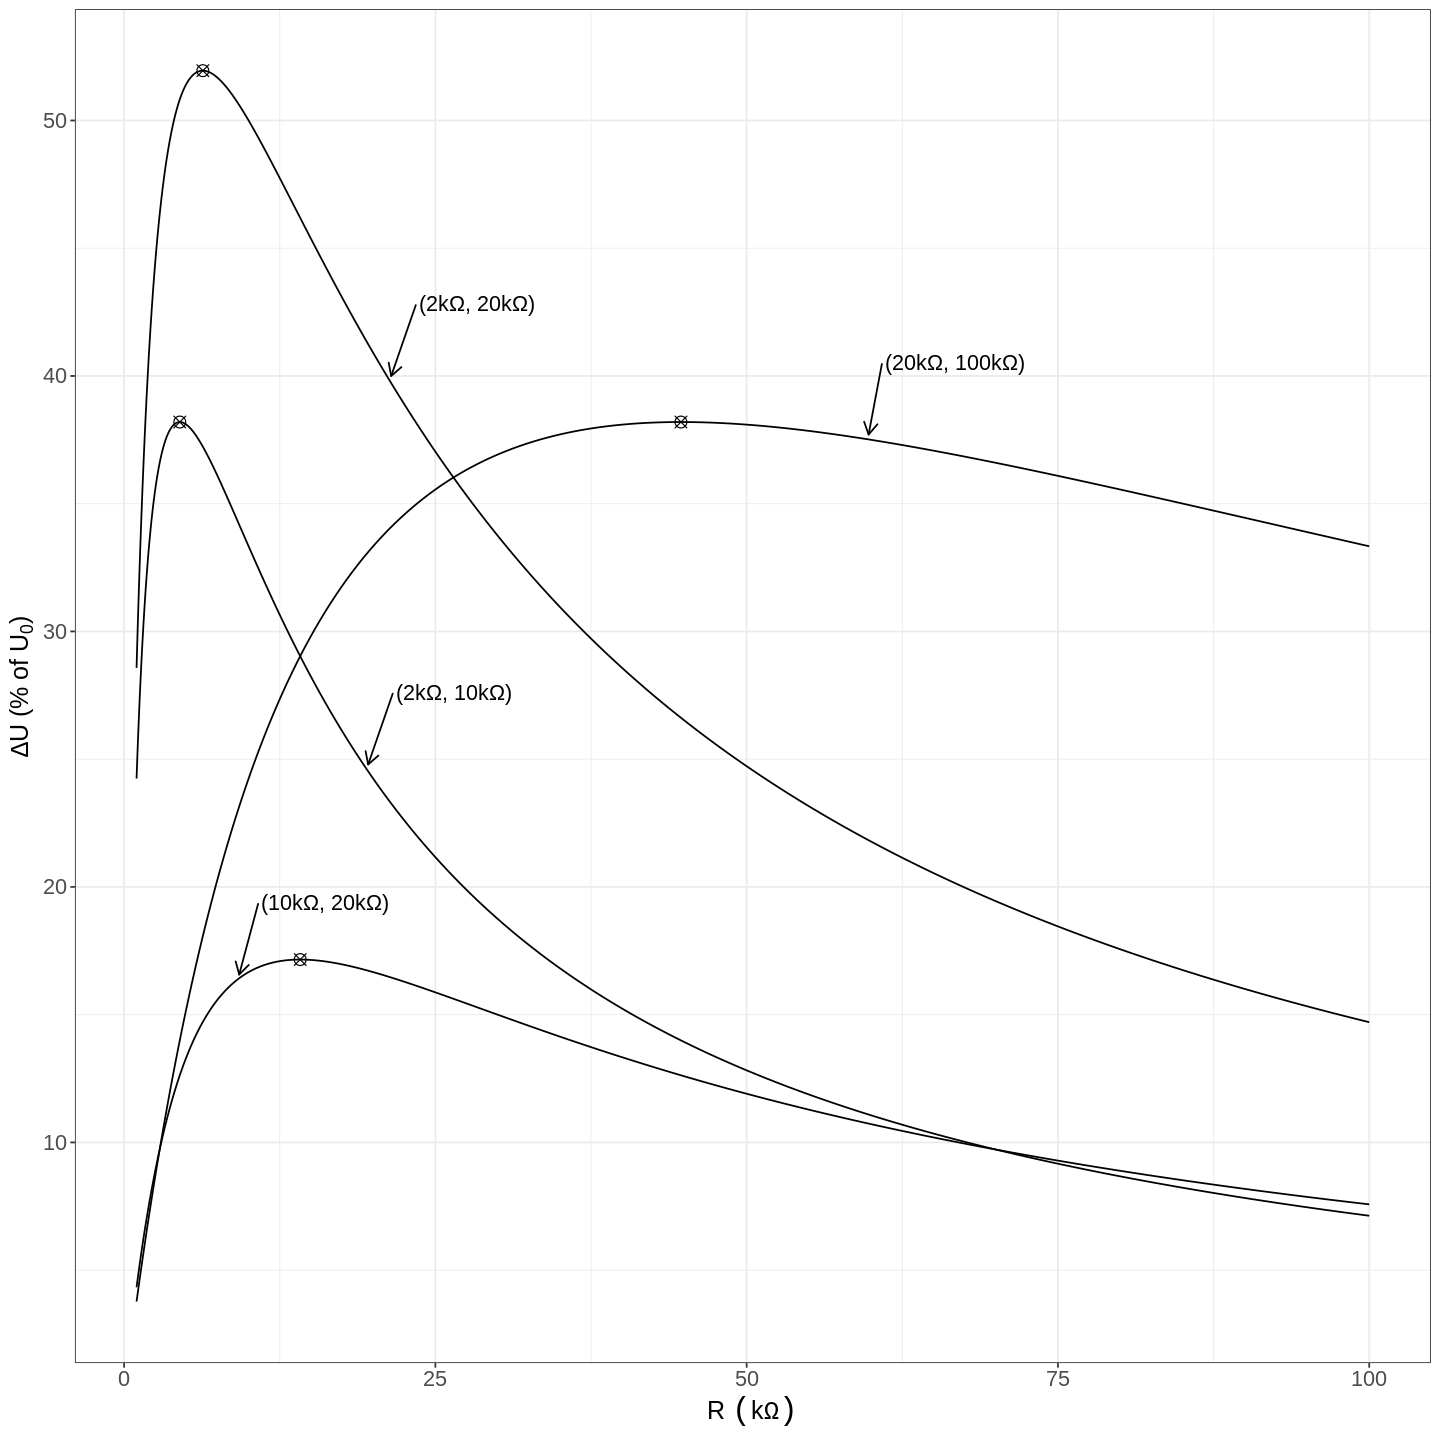

In [3]:
fig <- function(width, heigth) {
  options(repr.plot.width = width, repr.plot.height = heigth)
}

fig(12, 12)

RS <- list(c(2, 10), c(20, 100), c(2, 20), c(10, 20))
R3 <- seq(1, 100, .01)

u0 <- 100
myV <- function(u0, r3, rs) {
  (u0 * r3) / (rs + r3)
}
Vdiff <- function(rs, u0, r3) {
  myV(u0, r3, rs[1]) - myV(u0, r3, rs[2])
}

x <- R3
y <- lapply(RS, function(rs)
  sapply(x, FUN = Vdiff, u0 = u0, rs = rs))
xs <- lapply(lapply(RS, prod), sqrt)
ys <-
  sapply(1:length(RS), function(i)
    Vdiff(rs = RS[[i]], u0 = u0, r3 = xs[[i]]))

move <- c(15, 15, 15, -5)
xsL <- sapply(1:length(RS), function(i)
  xs[[i]] + move[i])
ysL <-
  sapply(1:length(RS), function(i)
    Vdiff(rs = RS[[i]], u0 = u0, r3 = xsL[[i]]))


df <- data.frame(x, y)
curves <-
  unlist(lapply(RS, function(x)
    paste(sep = "", "(", x[1], "kΩ, ", x[2], "kΩ)")))
colnames(df) <- c("x", curves)
dfPlot <- melt(df, id.vars = "x")

dfMax <-
  data.frame(x = unlist(xs),
             variable = curves,
             value = unlist(ys))
dfLabel <-
  data.frame(x = unlist(xsL),
             variable = curves,
             value = unlist(ysL))

p <-
  ggplot(data = dfPlot, aes(x = x, y = value, color = variable)) +
  geom_line() +
  geom_point(data = dfMax, shape = 13, size = 3)
p <- p + geom_text_repel(
  data = dfLabel,
  aes(#color = factor(cyl),
    size = 5,
    label = variable),
  point.padding = 0.25,
  box.padding = 0.25,
  nudge_y = 3,
  nudge_x = 7,
  arrow = arrow(length = unit(0.01, 'npc')),
  # Strength of the repulsion force.
  force = 1,
  # Maximum iterations of the naive repulsion algorithm O(n^2).
  max.iter = 3e3
) +
  theme_bw() +
  theme(legend.position = "none") +
  scale_color_manual(values = rep("black", length(RS))) +
  xlab(expression("R " * ("k" * Omega))) +
  ylab(expression(Delta * "U" * " (% of " * U[0] * ")")) +
  theme(axis.text = element_text(size = 13),
        axis.title = element_text(size = 15))

plot(p)
